In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples




In [91]:
df = pd.read_table('oldDat.csv', delimiter=",", header='infer')
df = pd.read_table('newdat.csv', delimiter=",", header='infer')

df.head()



,Urine,Fish,Water,Rose
0,2.205453,3.196628,3.112753,3.428742
1,1.265030,1.966658,3.970315,4.788753
2,2.475811,2.054764,2.540025,2.550220
3,1.178293,2.613156,3.837929,5.619541
4,2.333389,1.895739,2.646985,3.460526


In [92]:
len(df)

38

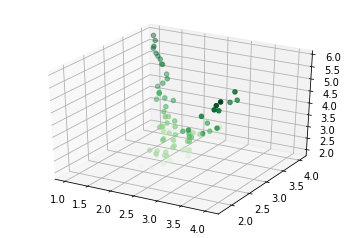

In [93]:

w =df.iloc[:,0]
x =df.iloc[:,1]
y = df.iloc[:,2]
z = df.iloc[:,3]
datas = pd.DataFrame(data=[w, x,y,z])

X = datas.iloc[::]
X = np.array(X)


ax = plt.axes(projection='3d')
ax.scatter3D(X[0],X[2],X[3], c=X[2], cmap = 'Greens')
ax.scatter3D(y, x, z, c=z, cmap='Greens')
X = np.array(X.T)

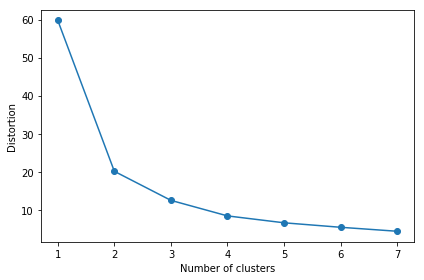

In [56]:
distortions = []
for i in range(1, 8):
    km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=50,
                 max_iter=300,
                 random_state=1)
    km.fit(X)
    
    distortions.append(km.inertia_)
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

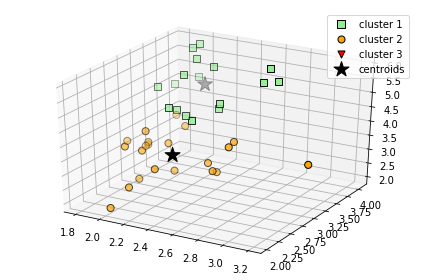

In [89]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=300, 
            max_iter=300,
            tol=1e-04,
            random_state=0)


y_km = km.fit_predict(X)


ax = plt.axes(projection='3d')


ax.scatter3D(X[y_km == 0, 1],
            X[y_km == 0, 2],
            X[y_km == 0, 3],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
ax.scatter3D(X[y_km == 1, 1],
            X[y_km == 1, 2],
             X[y_km == 1, 3],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
ax.scatter3D(X[y_km == 2, 1],
            X[y_km == 2, 2],
              X[y_km == 2, 3],
            s=50, c='red',
            marker='v', edgecolor='black',
            label='cluster 3')
#ax.scatter3D(X[y_km == 3, 0],
#            X[y_km == 3, 1],
#              X[y_km == 3, 2],
#            s=50, c='blue',
#            marker='v', edgecolor='black',
#            label='cluster 4')
ax.scatter3D(km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 2],
             km.cluster_centers_[:, 3],
            s=250, marker='*',
            c='black', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

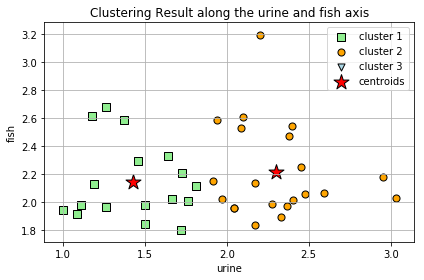

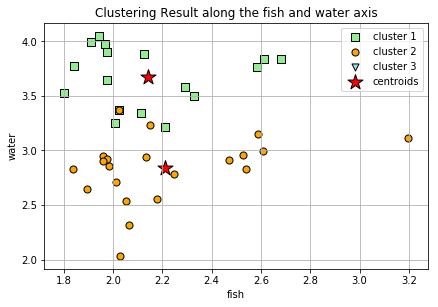

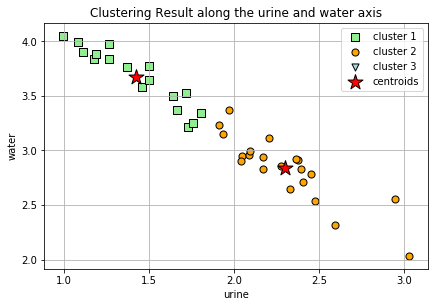

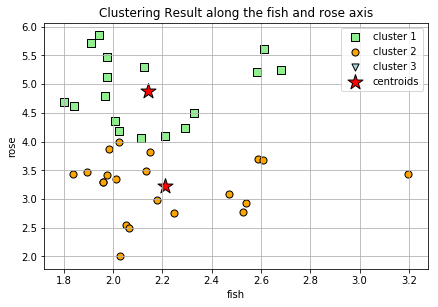

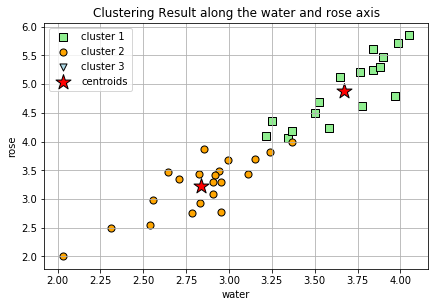

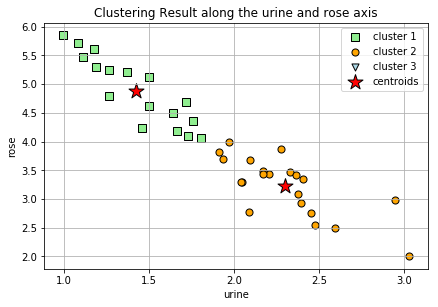

In [84]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            #X[y_km == 0, 2],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
             #X[y_km == 1, 2],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
              #X[y_km == 2, 2],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
"""
plt.scatter(X[y_km == 3, 0],
            #X[y_km == 3, 1],
              X[y_km == 3, 2],
            s=50, c='blue',
            marker='v', edgecolor='black',
            label='cluster 4')
            """
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
             #km.cluster_centers_[:, 2],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel('urine')
plt.ylabel('fish')
plt.title('Clustering Result along the urine and fish axis')
plt.grid()
plt.tight_layout()
plt.show()

plt.scatter(#X[y_km == 0, 0],
            X[y_km == 0, 1],
            X[y_km == 0, 2],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(#X[y_km == 1, 0],
            X[y_km == 1, 1],
            X[y_km == 1, 2],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(#X[y_km == 2, 0],
            X[y_km == 2, 1],
            X[y_km == 2, 2],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
"""
plt.scatter(X[y_km == 3, 0],
            #X[y_km == 3, 1],
              X[y_km == 3, 2],
            s=50, c='blue',
            marker='v', edgecolor='black',
            label='cluster 4')
            """
plt.scatter(#km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 2],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.xlabel('fish')
plt.ylabel('water')
plt.title('Clustering Result along the fish and water axis')
plt.show()


plt.scatter(X[y_km == 0, 0],
            #X[y_km == 0, 1],
            X[y_km == 0, 2],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            #X[y_km == 1, 1],
            X[y_km == 1, 2],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            #X[y_km == 2, 1],
            X[y_km == 2, 2],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
"""
plt.scatter(X[y_km == 3, 0],
            #X[y_km == 3, 1],
              X[y_km == 3, 2],
            s=50, c='blue',
            marker='v', edgecolor='black',
            label='cluster 4')
            """
plt.scatter(km.cluster_centers_[:, 0],
            #km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 2],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.xlabel('urine')
plt.ylabel('water')
plt.title('Clustering Result along the urine and water axis')
plt.show()



plt.scatter(X[y_km == 0, 1],
            #X[y_km == 0, 1],
            X[y_km == 0, 3],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 1],
            #X[y_km == 1, 1],
            X[y_km == 1, 3],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 1],
            #X[y_km == 2, 1],
            X[y_km == 2, 3],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
"""
plt.scatter(X[y_km == 3, 0],
            #X[y_km == 3, 1],
              X[y_km == 3, 2],
            s=50, c='blue',
            marker='v', edgecolor='black',
            label='cluster 4')
            """
plt.scatter(km.cluster_centers_[:, 1],
            #km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 3],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.xlabel('fish')
plt.ylabel('rose')
plt.title('Clustering Result along the fish and rose axis')
plt.show()




plt.scatter(X[y_km == 0, 2],
            #X[y_km == 0, 1],
            X[y_km == 0, 3],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 2],
            #X[y_km == 1, 1],
            X[y_km == 1, 3],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 2],
            #X[y_km == 2, 1],
            X[y_km == 2, 3],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
"""
plt.scatter(X[y_km == 3, 0],
            #X[y_km == 3, 1],
              X[y_km == 3, 2],
            s=50, c='blue',
            marker='v', edgecolor='black',
            label='cluster 4')
            """
plt.scatter(km.cluster_centers_[:, 2],
            #km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 3],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.xlabel('water')
plt.ylabel('rose')
plt.title('Clustering Result along the water and rose axis')
plt.show()


plt.scatter(X[y_km == 0, 0],
            #X[y_km == 0, 1],
            X[y_km == 0, 3],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            #X[y_km == 1, 1],
            X[y_km == 1, 3],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            #X[y_km == 2, 1],
            X[y_km == 2, 3],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
"""
plt.scatter(X[y_km == 3, 0],
            #X[y_km == 3, 1],
              X[y_km == 3, 2],
            s=50, c='blue',
            marker='v', edgecolor='black',
            label='cluster 4')
            """
plt.scatter(km.cluster_centers_[:, 0],
            #km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 3],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.xlabel('urine')
plt.ylabel('rose')
plt.title('Clustering Result along the urine and rose axis')
plt.show()

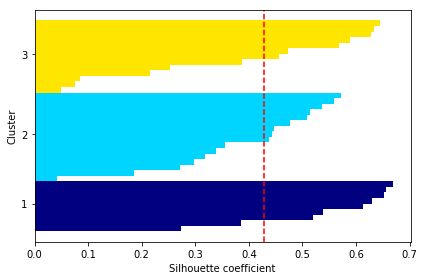

In [90]:
from matplotlib import cm

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=300, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()